# Cluster Analysis

## Agenda

* Problem Statement
* Understanding Data
* Data Preparation
    * Choose relevant features
    * Missing value analysis
    * Data standardization
* K-Means Clustering
* Clustering in practice
    * Silhouette value of clusters
    * Stability check of the clusters
    * Categorize new samples into predefined clusters

### Problem Statement

The data set (Cereals.csv) given to you has nutritional information of various cereals available in the market. Based on the information, the elementary public schools would like to choose a set of cereals to include in their daily cafeterias. Every day a different cereal is offered, but all cereals should support a healthy diet.

##### Attributes Description
* name: Name of cereal
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: rating of the cereals (Possibly from Consumer Reports)

In [5]:
#Import required packages


### Understanding Data

In [6]:
# read the data from Cereals.csv
cereals = 
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [7]:
cereals.tail()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193
76,Wheaties_Honey_Gold,110,2,1,200,1.0,16.0,8.0,60.0,25,1,1.0,0.75,36.187559


In [8]:
# Data type of each attribute


name         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [9]:
#Summary statistics


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### Data Preparation

#### Choose required features

In [1]:
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + \
                    round(cereals['rating'],2).astype(str) + ')'
cereals.head(3)

NameError: name 'cereals' is not defined

In [11]:
# drop name, shelf, rating

cereals.head(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,100%_Bran (3 - 68.4)
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00,100%_Natural_Bran (3 - 33.98)
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33,All-Bran (3 - 59.43)


In [12]:
cereal_label = cereals['label']
## Select all columns except "label"

cereals.head(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33


In [13]:
cereal_label

0                     100%_Bran (3 - 68.4)
1            100%_Natural_Bran (3 - 33.98)
2                     All-Bran (3 - 59.43)
3     All-Bran_with_Extra_Fiber (3 - 93.7)
4               Almond_Delight (3 - 34.38)
                      ...                 
72                     Triples (3 - 39.11)
73                        Trix (2 - 27.75)
74                  Wheat_Chex (1 - 49.79)
75                    Wheaties (1 - 51.59)
76         Wheaties_Honey_Gold (1 - 36.19)
Name: label, Length: 77, dtype: object

#### Missing value analysis

In [14]:
# Find missing values


calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
weight      0
cups        0
dtype: int64

In [15]:
# Imputer, use mean, fit


SimpleImputer()

In [16]:
#Imputer_transform
cereals = 

In [17]:
cereals.isnull().sum(axis=0)

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
weight      0
cups        0
dtype: int64

#### Data Standardization

Why should we standardize data?

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [18]:
#import standardscaler
#fit
#Tranform
cereals_std.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.542013,-0.237495,2.627053,-0.14627,-0.198067,-2.123870
1,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.764055,0.225316,0.526376,-1.27255,-0.198067,0.774053
2,-1.905397,1.337319,-0.012988,1.204578,2.892113,-2.023374,-0.468901,3.206550,-0.14627,-0.198067,-2.123870
3,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.764055,-1.625929,3.351425,-0.14627,-0.198067,-1.388576
4,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.208138,0.225316,0.000000,-0.14627,-0.198067,-0.307262


In [19]:
cereals_std.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.258012e-16,5.767392e-17,1.013349e-16,-5.190653e-17,1.463476e-16,-4.527403e-16,-2.144749e-16,-4.758099e-17,5.190653e-17,-1.982541e-16,1.665335e-16
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-2.542013e+00,-1.625929e+00,-1.212115e+00,-1.272550e+00,-3.542628e+00,-2.469891e+00
25%,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-7.267769e-01,-9.317120e-01,-7.774919e-01,-1.462701e-01,-1.980675e-01,-6.532825e-01
50%,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-4.606439e-16,-6.089621e-03,-1.255577e-01,-1.462701e-01,-1.980675e-01,-3.072619e-01
75%,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.698204e-01,9.195328e-01,3.090651e-01,-1.462701e-01,-1.980675e-01,7.740527e-01
max,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,2.125737e+00,1.845155e+00,3.351425e+00,3.232570e+00,3.146493e+00,2.936682e+00


### K-Means Clustering

- Kmeans is a distance based iterative technique, where the instances that are "closer" are "grouped" together forming a "cluster". 
- This "closeness" is computed by distances,by default, Euclidean distances
- We need to specify prior, how many clusters we want to get.
- What is iterative in this case?
    - We specify a number of clusters we need, so in the first iteration, centroids(centre) of the cluster are randomly picked in the data (this centroid need not be a data point but could be any other point as well). For eg: if we need 3 clusters, 3 centroids are randomly picked.
    - Now with respect to each of these centroids, distance is computed for each of the points in the data and the data point is assigned to that cluster for which the point's distance is closest to its centroid. This is "Assignment phase".
    - Once all points are assigned to the clusters, new centroids are computed from the points of each cluster (in 2d it is (x1+x2)/2, (y1+y2)/2)..remember this formula :)
    - Once, this new centroids are computed, the assignment phase starts-- compute the distance between each of the data points with each of the new centroids and assign the point to the closest cluster. After assignment, the new cluster centroids are computed. This process continues until there is no change in cluster centroids from previous iteration

In [20]:
# Perform kmean with k=5
from sklearn.cluster import KMeans


In [21]:
kmeans_clusters

array([4, 2, 4, 4, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3, 1,
       2, 1, 2, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 3,
       0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 3, 3, 2, 3, 0, 2, 3, 1, 1, 3, 3, 3,
       2, 1, 3, 1, 0, 1, 1, 2, 1, 1, 2], dtype=int32)

In [22]:
#Number of clusters
np.unique(kmeans_clusters, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([12, 17, 34, 11,  3]))

In [23]:
kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),4
1,100%_Natural_Bran (3 - 33.98),2
2,All-Bran (3 - 59.43),4
3,All-Bran_with_Extra_Fiber (3 - 93.7),4
4,Almond_Delight (3 - 34.38),2


#### Inspecting cluster centroids to understand average statistics of each cluster

In [24]:
## Using inverse_transform to retrive actual values from standardized data
cluster_centroids =  
cluster_centroids

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,135.000000,3.166667,1.666667,180.416667,3.541667,15.625000,10.916667,172.083333,37.500000,1.287500,0.758333
1,105.294118,2.705882,0.529412,237.058824,1.176471,19.294118,3.000000,62.352941,42.647059,1.000000,1.002941
2,108.529412,2.058824,1.294118,161.029412,1.397059,12.661765,9.411765,74.078431,24.264706,1.000000,0.782353
3,85.454545,2.727273,0.272727,8.636364,2.063636,15.800239,2.547847,93.060606,9.090909,0.893636,0.846364
4,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.000000,1.000000,0.386667


In [25]:
cluster_centroids.shape

(5, 11)

In [26]:
cluster_centroids.to_csv("best_kmeans_cluster_centroids.csv")

#### In the above case, we have randomly given clusters number. But how would we know the optimal clusters
- The clustering is said to be good, if the points in the cluster are closer to each other and the clusters themselves are far apart. The two quantities which describe the above said factors are "Within Sum of Squares (wss)" and "Between Sum of Squares(bss)" respectively. In kmeans function in python, wss is defined as inertia. 
- Ideally, if wss is minimum, we have a better clustering. 
- Now the question is.. how do we choose k 

**Parameter description**

n_clusters : The number of clusters to find.

n_init : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter : max iterations of recomputing new cluster centroids 

In [27]:
wss= {}
for k in range(1, 21):
    kmeans_loop = KMeans(n_clusters=k,n_init=30,max_iter=300,random_state=1000).fit(cereals_std)
    clusters = kmeans_loop.labels_
    wss[k] = kmeans_loop.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center


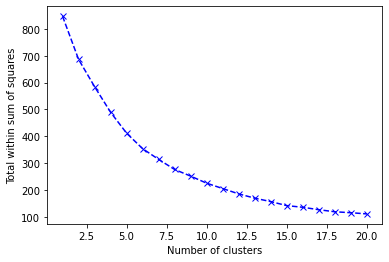

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()

plt.plot(list(wss.keys()),list(wss.values()), 'bx--')
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

### Silhouette Analysis
**Higher the silhouette score better the clustering**

*The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.*

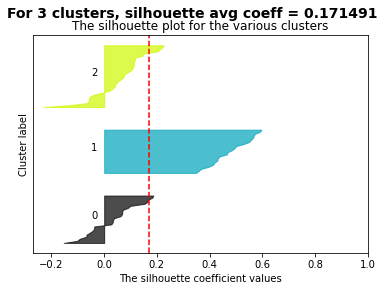

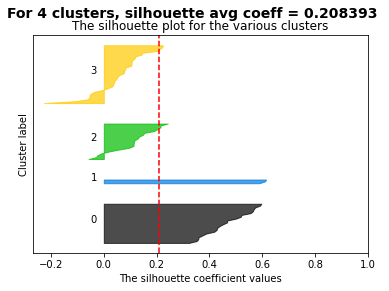

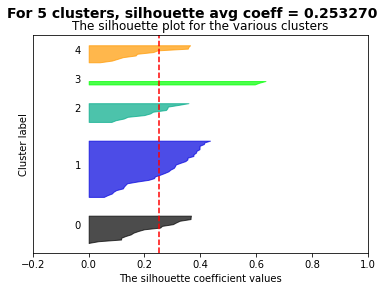

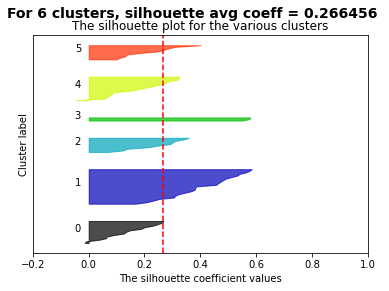

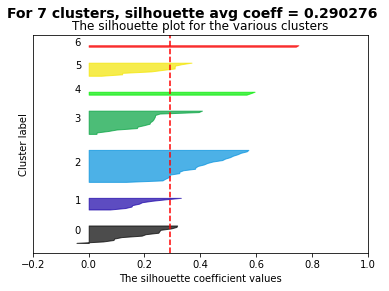

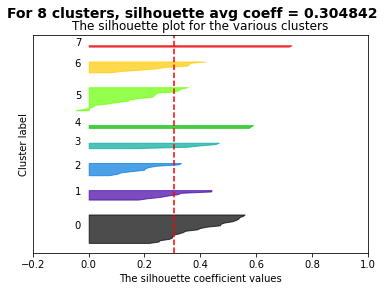

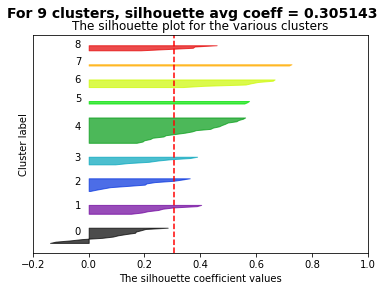

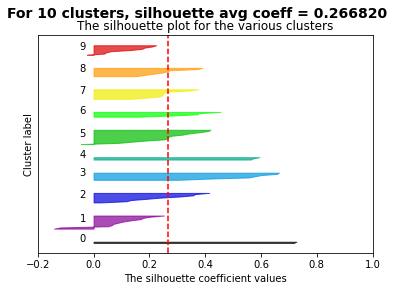

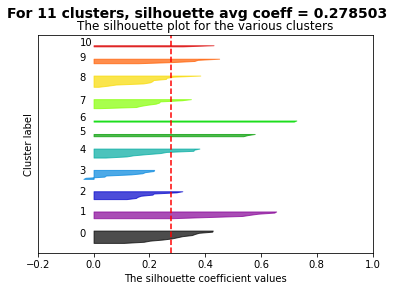

In [29]:
## Standard plotting code copied from sklearn documentation.
## Just change "X_matrix" to the data of your choice

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### Just change this to your dataframe
X_matrix = cereals_std.values

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

#### Note: Higher the silhouette score better the clustering.
Hence best K value for this dataset is 8

In [30]:
best_kmeans = KMeans(n_clusters=8, random_state=1240)
best_kmeans.fit(cereals_std)
best_kmeans_labels = best_kmeans.predict(cereals_std)

In [31]:
kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),4
1,100%_Natural_Bran (3 - 33.98),0
2,All-Bran (3 - 59.43),4
3,All-Bran_with_Extra_Fiber (3 - 93.7),4
4,Almond_Delight (3 - 34.38),1


### Add Cluster Labels to Original Data

In [32]:
cereals = pd.read_csv("Cereals.csv")
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

final_cluster_data = pd.merge(cereals, kmeans_results, on='label')
final_cluster_data.head(10)


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label,kmeans_cluster
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.00,0.33,100%_Bran (3 - 68.4),4
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.00,1.00,100%_Natural_Bran (3 - 33.98),0
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.00,0.33,All-Bran (3 - 59.43),4
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.00,0.50,All-Bran_with_Extra_Fiber (3 - 93.7),4
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.00,0.75,Almond_Delight (3 - 34.38),1
5,110,2,2,180,1.5,10.5,10.0,70.0,25,1.00,0.75,Apple_Cinnamon_Cheerios (1 - 29.51),1
6,110,2,0,125,1.0,11.0,14.0,30.0,25,1.00,1.00,Apple_Jacks (2 - 33.17),1
7,130,3,2,210,2.0,18.0,8.0,100.0,25,1.33,0.75,Basic_4 (3 - 37.04),7
8,90,2,1,200,4.0,15.0,6.0,125.0,25,1.00,0.67,Bran_Chex (1 - 49.12),2
9,90,3,0,210,5.0,13.0,5.0,190.0,25,1.00,0.67,Bran_Flakes (3 - 53.31),2


In [33]:
final_cluster_data.shape

(77, 13)

In [34]:
final_cluster_data.kmeans_cluster.value_counts()

1    21
2    12
7    10
5    10
0     8
6     7
3     6
4     3
Name: kmeans_cluster, dtype: int64

### Analyzing clusters

In [35]:
ClusterLevelMean = final_cluster_data.groupby(['kmeans_cluster']).mean().reset_index()
ClusterLevelMean

,kmeans_cluster,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,0,107.500000,3.500000,2.500000,99.375000,2.525000,11.500000,6.571429,119.375000,18.75,1.000000,0.583750
1,1,110.952381,1.476190,1.047619,166.190476,0.547619,12.547619,11.380952,45.250000,25.00,1.000000,0.875238
2,2,100.833333,3.250000,0.666667,208.333333,2.625000,15.791667,4.333333,102.083333,25.00,1.000000,0.824167
3,3,116.666667,2.666667,0.833333,208.333333,1.833333,18.166667,6.333333,95.833333,100.00,1.133333,0.958333
4,4,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.00,1.000000,0.386667
5,5,84.000000,2.500000,0.100000,9.500000,2.000000,15.900000,2.100000,90.555556,10.00,0.883000,0.864000
6,6,108.571429,1.857143,0.285714,261.428571,0.285714,21.571429,2.714286,36.428571,25.00,1.000000,1.054286
7,7,134.000000,3.200000,1.800000,180.500000,3.650000,15.250000,10.800000,174.000000,25.00,1.265000,0.735000


In [36]:
ClusterLevelStdev = final_cluster_data.groupby(['kmeans_cluster']).std().reset_index()
ClusterLevelStdev

,kmeans_cluster,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,0,8.864053,0.755929,1.195229,61.379237,0.710634,2.101587,1.397276,22.903135,11.572751,0.000000,0.200210
1,1,5.389584,0.511766,0.804748,55.269901,0.630570,1.716863,2.085094,22.505847,0.000000,0.000000,0.162838
2,2,7.929615,1.356801,0.651339,39.962103,1.189442,1.993835,2.386833,33.129109,0.000000,0.000000,0.255857
3,3,18.618987,0.516398,0.408248,56.361926,1.471960,2.483277,4.457204,71.792525,0.000000,0.216025,0.102062
4,4,11.547005,0.000000,0.577350,72.341781,2.645751,1.527525,3.214550,26.457513,0.000000,0.000000,0.098150
5,5,18.973666,0.849837,0.316228,25.215736,1.414214,3.348300,2.884826,37.370146,12.909944,0.208702,0.189397
6,6,3.779645,0.377964,0.487950,26.726124,0.487950,0.786796,0.487950,11.443443,0.000000,0.000000,0.226852
7,7,15.055453,0.421637,0.918937,43.362170,1.491643,2.974428,2.149935,50.815571,0.000000,0.155367,0.155367


#### Checking cluster stability

In [2]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [3]:
indices=cereals_std.sample(frac=0.9,random_state=123).index
print(indices)

NameError: name 'cereals_std' is not defined

In [39]:
cereals_std_subset=cereals_std.iloc[indices,:]

In [40]:
cereals_std_subset.shape

(69, 11)

In [41]:
kmeans_object = KMeans(n_clusters=5,n_init=30,max_iter=300,random_state=1000)
kmeans_object.fit(cereals_std)
clus1= kmeans_object.predict(cereals_std)

In [42]:
kmeans_object = KMeans(n_clusters=5,n_init=30,max_iter=300,random_state=1000)
kmeans_object.fit(cereals_std_subset)
clus2= kmeans_object.predict(cereals_std_subset)

In [43]:
print(len(clus1))
print(len(clus2))

77
69


In [44]:
clus1=clus1[indices]
print(len(clus1))

69


In [54]:
adjusted_rand_score(clus1,clus2)

0.724479057040623

#### References:

* https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/

* https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Why should we standardize data?

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/